# Noise Map
## ISO 9613-2: Calculation of Noise from Wind Turbines

ISO 9613-2 is an international standard that provides guidelines for the calculation of outdoor sound propagation from industrial sources {cite:p}`iso_9613`. This implementation of the standard incorporates four distinct forms of attenuation: geometric spreading attenuation from the point source ($A_{div}$), atmospheric absorption attenuation ($A_{atm}$), attenuation due to ground effects ($A_{gr}$), and attenuation resulting from barriers like terrain ($A_{bar}$). These attenuations are combined such that the total attenuation is given by:

$$A = A_{div} + A_{atm} + A_{gr} + A_{bar}$$

In this model, wind turbines are treated as point sources of noise emission, located at the hub of each turbine. The model considers the sound power level for each octave band of each point source. The noise level for each map tile is then calculated as:

$$ L_{AT} = 10 \cdot \log_{10}\left(\sum_{i=1}^n\left(\sum_{j=1}^8 10^{0.1(L_{fT}(ij) + A_f(j))}\right)\right)$$

Here, $L_{fT}$ represents the sound power level of the individual point source for each octave band:

$$L_{fT} = L_W - A$$

$A_f$ denotes the A-weighting function that ensures normalization to 0 dB at a frequency of 1000 Hz, and can be calculated as such:

$$
    R_a(f) = \frac{{12194^2 \cdot f^4}}{{(f^2 + 20.6^2) \cdot \sqrt{{(f^2 + 107.7^2) \cdot (f^2 + 737.9^2)}} \cdot (f^2 + 12194^2)}}
$$

$$
    A(f) = 20 \cdot \log_{10}(R_{af}) + 2.00
$$

In [16]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandler, ElevationHandlerTest, import_point_source_data, calc_extent, solve_noise_map
import numpy as np
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import GoogleTiles
import cartopy.crs as ccrs
import pandas as pd

In [17]:
# map_boundaries = [11.9, 12.1, 54.9, 55.1]
# dist = 1500
# point_source_data = import_point_source_data("Prøvestenen.json")
# map_boundaries = calc_extent(point_source_data, dist)
# # map_boundaries = [0, 210, 0, 210]
map_shape = [50, 50]
# elevation_handler = ElevationHandler(map_boundaries, map_shape)
# elevation_handler = ElevationHandlerTest(map_boundaries, map_shape)

point_source_data = pd.DataFrame(data=[
    {
        "latitude": 55.124232837087455,
        "longitude": 10.270998350214546,
        "h": 80,
        "octave_band": {
            "63": 90.0,
            "125": 95.0,
            "250": 100.0,
            "500": 102.5,
            "1000": 104.0,
            "2000": 98.5,
            "4000": 93.0,
            "8000": 89.5
        }
    },
    {
        "latitude": 55.12513732938618,
        "longitude": 10.264118289154899,
        "h": 85,
        "octave_band": {
            "63": 88.0,
            "125": 92.5,
            "250": 98.0,
            "500": 101.0,
            "1000": 105.5,
            "2000": 97.0,
            "4000": 91.5,
            "8000": 88.0
        }
    },
    {
        "latitude": 55.12851309352396,
        "longitude": 10.268908586941558,
        "h": 90,
        "octave_band": {
            "63": 85.0,
            "125": 90.0,
            "250": 95.5,
            "500": 100.0,
            "1000": 102.0,
            "2000": 96.5,
            "4000": 92.0,
            "8000": 89.0
        }
    }
])

map_shape = [200, 200]
dist = 1500
map_boundaries = calc_extent(point_source_data, dist)
elevation_handler = ElevationHandler(map_boundaries, map_shape)
LDW = solve_noise_map(elevation_handler, point_source_data)

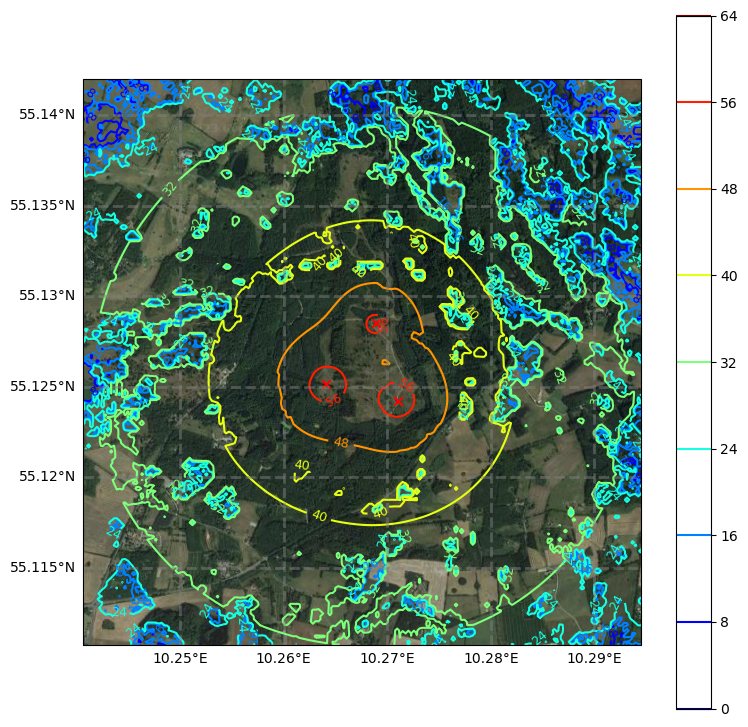

In [18]:
plt.figure(figsize=(9, 9))
imagery = GoogleTiles(style = "satellite")
ax = plt.axes(projection=imagery.crs)
ax.set_extent(map_boundaries)

cp = ax.contour(elevation_handler.long_range, elevation_handler.lat_range, LDW, alpha = 1, cmap = "jet", transform=ccrs.PlateCarree())
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "x", color = "red", transform=ccrs.PlateCarree())
plt.colorbar(cp, ax = ax)
plt.clabel(cp, fontsize = 9, inline=1)

ax.add_image(imagery, 14) # 16
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

plt.tight_layout
plt.show()
